In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn import metrics

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
Happiness = pd.read_csv('/content/drive/My Drive/Team B5: Best M8s/DSO 545 Statistical Computing and Data Visualization /Filtered_World_Bank_Values.csv')

In [ ]:
Happiness['HDI_change_percent']=((Happiness['2021 HDI']-Happiness['2019 HDI'])/Happiness['2019 HDI'])*100

In [ ]:
Happiness.loc[25,:]

Country                                                                                              Chile
2019 HDI                                                                                             0.861
2020 HDI                                                                                             0.852
2021 HDI                                                                                             0.855
PM2.5_2017                                                                                       97.663018
Unemployment                                                                                         8.886
Political Stability and absence of violence                                                       0.161352
GINI                                                                                                  44.9
Scientific and Technical journal articles                                                          8979.79
Foreign direct investment, net inflow

In [ ]:
Happiness_2019=Happiness[['Country','2019 HDI']]
Happiness_2019['Year']=2019
Happiness_2019 = Happiness_2019.rename(columns={'2019 HDI': 'HDI'})
Happiness_2019_top_five=Happiness_2019.sort_values(by=('HDI'),ascending=False).head(5).reset_index()
Happiness_2019_tail_five=Happiness_2019.sort_values(by=('HDI'),ascending=False).tail(5).reset_index()

Happiness_2020=Happiness[['Country','2020 HDI']]
Happiness_2020['Year']=2020
Happiness_2020 = Happiness_2020.rename(columns={'2020 HDI': 'HDI'})
Happiness_2020_top_five=Happiness_2020.sort_values(by=('HDI'),ascending=False).head(5).reset_index()
Happiness_2020_tail_five=Happiness_2020.sort_values(by=('HDI'),ascending=False).tail(5).reset_index()

Happiness_2021=Happiness[['Country','2021 HDI']]
Happiness_2021['Year']=2021
Happiness_2021 = Happiness_2021.rename(columns={'2021 HDI': 'HDI'})
Happiness_2021_top_five=Happiness_2021.sort_values(by=('HDI'),ascending=False).head(5).reset_index()
Happiness_2021_tail_five=Happiness_2021.sort_values(by=('HDI'),ascending=False).tail(5).reset_index()

In [ ]:

gfg = sns.barplot(data = Happiness_2021_top_five,
            y = 'Country',
            x = 'HDI',color='#FAD02c')
gfg.set_title('Top five Countries in year 2021')
gfg.set_xlim(0.92, 0.97)

In [ ]:
gfg_2= sns.barplot(data = Happiness_2021_tail_five,
            y = 'Country',
            x = 'HDI',color='#333652')
gfg_2.set_title('Bottom five Countries in year 2021')
gfg_2.set_xlim(0.35, 0.45)

In [ ]:
#Yearly Change
Happiness_2019=Happiness[['Country','2019 HDI']]
Happiness_2019['Year']=2019
Happiness_2020=Happiness[['Country','2020 HDI']]
Happiness_2020['Year']=2020
Happiness_2021=Happiness[['Country','2021 HDI']]
Happiness_2021['Year']=2021
Happiness_2019 = Happiness_2019.rename(columns={'2019 HDI': 'HDI'})
Happiness_2020 = Happiness_2020.rename(columns={'2020 HDI': 'HDI'})
Happiness_2021 = Happiness_2021.rename(columns={'2021 HDI': 'HDI'})
Happiness_yearly=Happiness_2019.append(Happiness_2020)
Happiness_yearly=Happiness_yearly.append(Happiness_2021)
Happiness_yearly['Year']=Happiness_yearly['Year'].astype(int)
Happiness_yearly=Happiness_yearly.sort_values(by=['Year','HDI'],ascending=False).reset_index()


<ipython-input-82-6bce452b2712>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-82-6bce452b2712>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-82-6bce452b2712>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-82-6bce452

In [ ]:
import plotly.express as px

fig = px.choropleth(Happiness, locations="Country_Code",
                    color="2021 HDI", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

In [ ]:
import plotly.express as px

fig = px.choropleth(Happiness, locations="Country_Code",
                    color="HDI_change_percent", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

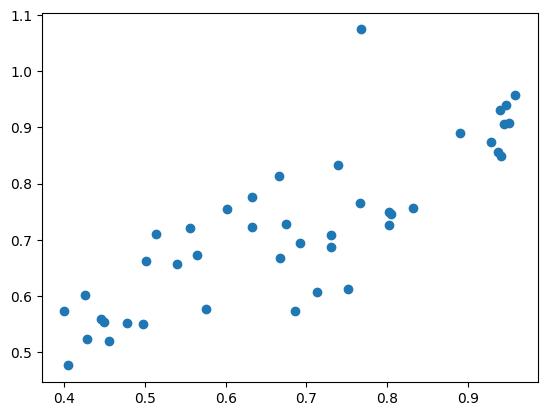

In [ ]:
#Regression Model

Happiness=Happiness.fillna(0)
Happiness['log_unemployment']=np.log(Happiness['Unemployment'])
x = Happiness[['PM2.5_2017', 'log_unemployment', 'Political Stability and absence of violence',

       'GINI', 'Scientific and Technical journal articles','Foreign direct investment, net inflows (BoP, current US$, in Billion) (avg)']]
y=Happiness['2021 HDI']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
model = LinearRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
coeff=pd.DataFrame(model.coef_, x.columns, columns = ['Coeff'])
plt.scatter(y_test, predictions)


In [ ]:
coeff

,Coeff
PM2.5_2017,-4.883246e-04
log_unemployment,1.323395e-02
Political Stability and absence of violence,9.246237e-02
GINI,-3.892799e-03
Scientific and Technical journal articles,4.871058e-07
"Foreign direct investment, net inflows (BoP, current US$, in Billion) (avg)",2.363205e-04


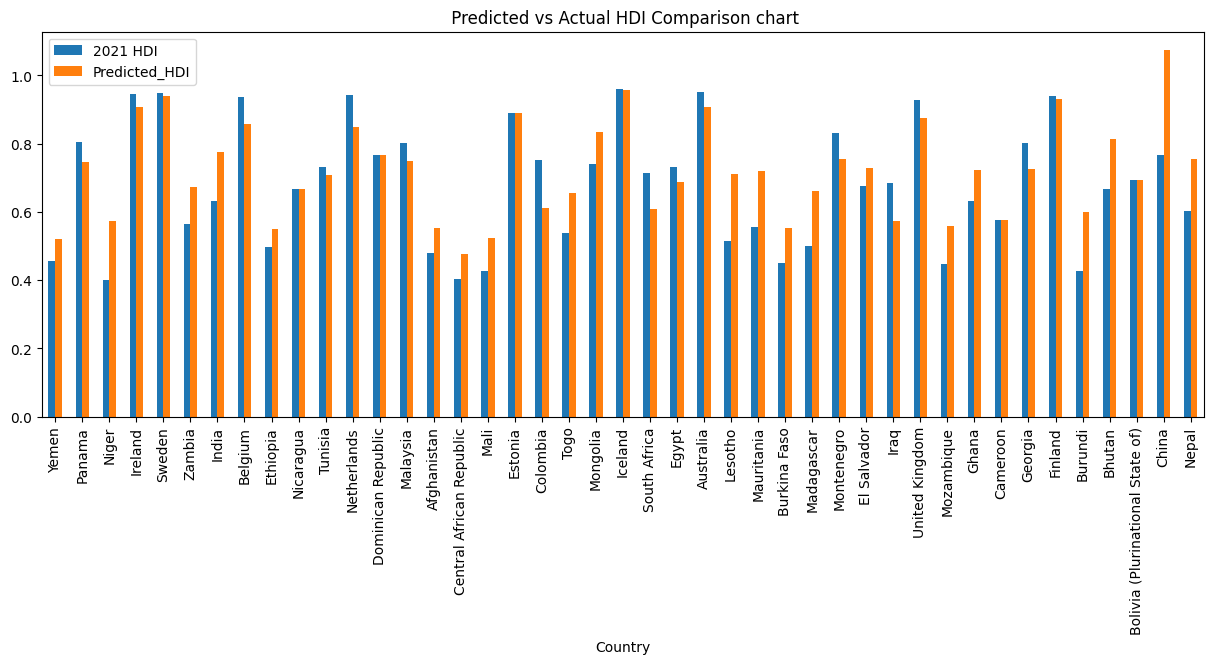

In [ ]:
df_test=pd.DataFrame()
df_test.index=x_test.index
df_test['Flag']=1
df_test=pd.merge(df_test,Happiness,how='left',left_index=True, right_index=True)
df_test['Predicted_HDI']=predictions
df_test.head()
df_test=df_test[['Country','2021 HDI','Predicted_HDI']]
df_test=df_test.set_index('Country')

# Plot grouped horizontal bar chart
df_test.plot.bar(title=" Predicted vs Actual HDI Comparison chart")
plt.gcf().set_size_inches(15,5)

(array([3., 2., 2., 6., 6., 9., 8., 4., 1., 2.]),
 array([-0.24341818, -0.19993791, -0.15645764, -0.11297738, -0.06949711,
        -0.02601685,  0.01746342,  0.06094369,  0.10442395,  0.14790422,
         0.19138448]),
 <BarContainer object of 10 artists>)

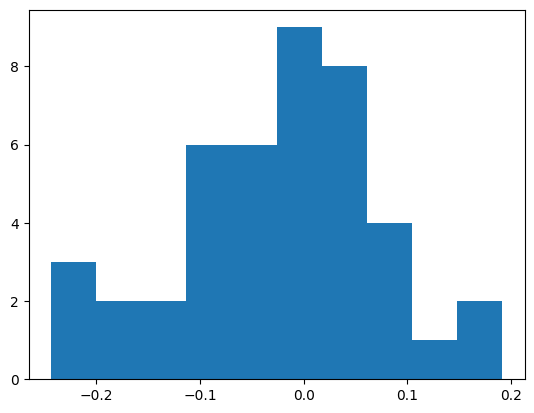

In [ ]:
(plt.hist(y_test - predictions)

In [ ]:
import statsmodels.api as sm

#define response variable

y=Happiness['2019 HDI']

#define predictor variables
x = Happiness[['PM2.5_2017', 'log_unemployment', 'Political Stability and absence of violence',

       'GINI', 'Scientific and Technical journal articles','Foreign direct investment, net inflows (BoP, current US$, in Billion) (avg)']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y_train, x_train).fit()

#view model summary
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:               2019 HDI   R-squared (uncentered):                   0.940
Model:                            OLS   Adj. R-squared (uncentered):              0.937
Method:                 Least Squares   F-statistic:                              247.6
Date:                Tue, 28 Nov 2023   Prob (F-statistic):                    2.64e-55
Time:                        03:30:24   Log-Likelihood:                          27.238
No. Observations:                 100   AIC:                                     -42.48
Df Residuals:                      94   BIC:                                     -26.85
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                                                                                  coef    std err          t      P>|t| 

In [ ]:
#RMSE
np.sqrt(metrics.mean_squared_error(y_test, predictions))

0.10114603086885064

In [ ]:
ineq = pd.read_excel('/content/drive/My Drive/Team B5: Best M8s/DSO 545 Statistical Computing and Data Visualization /Regions.xlsx',sheet_name='Table 3. Inequality-adjusted Hu')
IHDI = ineq[['Country', 'Region', 'Value', 'Inequality-adjusted HDI (IHDI) Value', 'Gini coefficient 2010-2021', 'Development Level']]
IHDI = IHDI.replace('..',0)
IHDI = IHDI[IHDI['Inequality-adjusted HDI (IHDI) Value'] != 0]

sns.scatterplot(data = IHDI, x = 'Value', y = 'Inequality-adjusted HDI (IHDI) Value', hue = 'Region').set(title='IHDI vs HDI')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('HDI Value')
plt.ylabel('Inequality Adjusted HDI Value')
plt.show()

In [ ]:
IHDI = IHDI[IHDI['Gini coefficient 2010-2021'] != 0]
sns.scatterplot(data = IHDI, x = 'Value', y = 'Gini coefficient 2010-2021', hue = 'Region').set(title='GINI vs HDI')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('HDI Value')
plt.ylabel('GINI Coefficient')
plt.show()

In [ ]:
Happiness['z_Political Stability and absence of violence'] = (Happiness['Political Stability and absence of violence'] - Happiness['Political Stability and absence of violence'].mean())/Happiness['Political Stability and absence of violence'].std()
Happiness['z_2021 HDI'] = (Happiness['2021 HDI'] - Happiness['2021 HDI'].mean())/Happiness['2021 HDI'].std()
from sklearn import cluster
model = cluster.KMeans(n_clusters = 4, random_state = 10,n_init=10)
model.fit(Happiness[['z_Political Stability and absence of violence', 'z_2021 HDI']])
Happiness['cluster'] = model.labels_

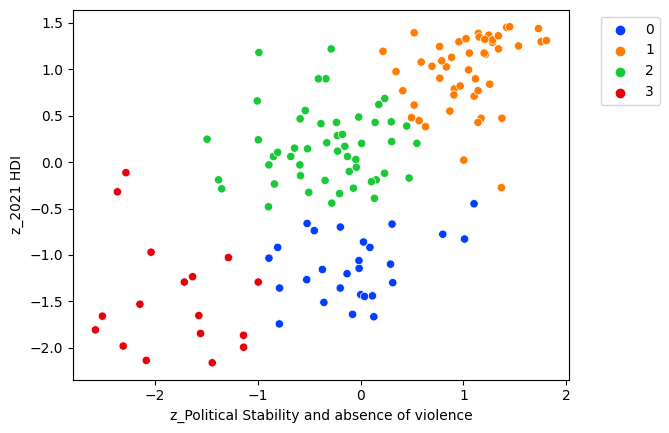

In [ ]:
sns.scatterplot(data = Happiness,
                x = 'z_Political Stability and absence of violence',
                y = 'z_2021 HDI',
                hue = 'cluster',
                palette = 'bright')

# the following line of code puts the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
